# Центральная предельная теоремя своими руками

Импорт необходимых библиотек:

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma        # для проверки ЦПТ воспользуемся гамма-распределением (ГР)
from scipy.stats import norm

Инициализация переменных для гамма-распределения и параметров для нормального распределения

In [67]:
gamma_k = 2.                                  # - параматр
gamma_theta = 5.                              # - к-т масштаба
gamma_expect = gamma_k*gamma_theta            # матожидание ГР - используется в качестве параметра для НР
gamma_sigma_2 = gamma_k * (gamma_theta**2.)   # дисперсия ГР - используется в качестве числителя второго параметра для НР

Генерация выборки размером 1000, отображение гистограммы ее значений и теоретического распределения:

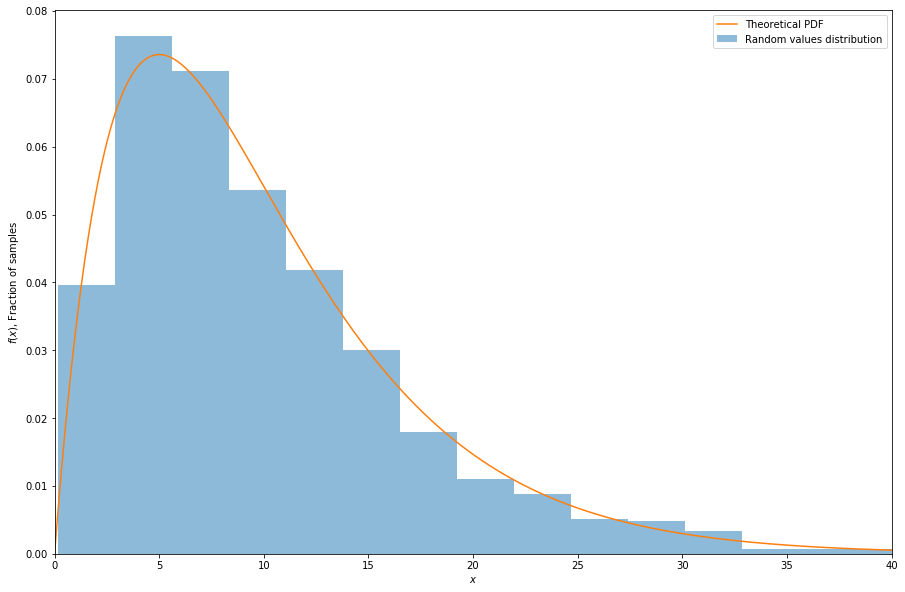

In [68]:
gamma_rv = gamma (gamma_k, 0, gamma_theta)

x = np.linspace(0, 40, 1000)
y = gamma_rv.rvs(1000)

plt.hist(y, bins = 19, normed = True, label = 'Random values distribution', alpha=0.5)
plt.plot(x, gamma_rv.pdf(x), label = 'Theoretical PDF')
plt.xlabel('$x$')
plt.ylabel('$f(x)$, Fraction of samples')
plt.xlim(0,40)
plt.legend(loc = 'upper right')
plt.show()

In [69]:
plt.cla()  #Очистка графика

In [70]:
n = np.array([3,5,23,50]) # Генерируем набор размеров выборок

Далее для каждого из размеров выборок (3, 5, 23, 50) запускается цикл, который 1000 раз возвращает выборочные средние значения выборок этого размера из ГР. Таким образом получается массив 4х1000 для n=3, 5, 23 и 50, соответственно.

In [71]:
Y = np.array([[np.mean(gamma_rv.rvs(value)) for i in range(1000)] for index, value in enumerate(n)]) 
Y.shape #проверяем размер массива

(4, 1000)

Ниже запускается цикл, который для каждого размера выборки генерирует:
    гистограмму распределения значений выборки;
    теоретическое нормальное распределение с соответсвующими параметрами матожидания и дисперсии, рассчитанных во 2ом блоке. При этом второй параметр НР рассчитывается в цикле, исходя из дисперсии (из 2 блока) и размера выборки.

In [72]:
for i in range(4):
    plt.subplot(2,2,i+1)
    n_bins = 32
    
    # Так как norm принимает std в качестве 
    # второго параметра, то из дисперсию исходного распределения нужно 
    # разделить на размер выборки и извлечь из отношения корень:
    std = (gamma_sigma_2/n[i])**(1./2.)  
    
    norm_rv = norm(gamma_expect, std)
    plt.hist(Y[i], bins = n_bins, normed = True, label="Sample means, n=%s" % n.item(i))
    plt.plot(x, norm_rv.pdf(x), label = 'Approximate normal PDF') 
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$, Fraction of samples')
    plt.xlim(0,30)
    plt.legend(loc = 'upper right')
    plt.rcParams['figure.figsize'] = (15, 10)
    plt.tight_layout()

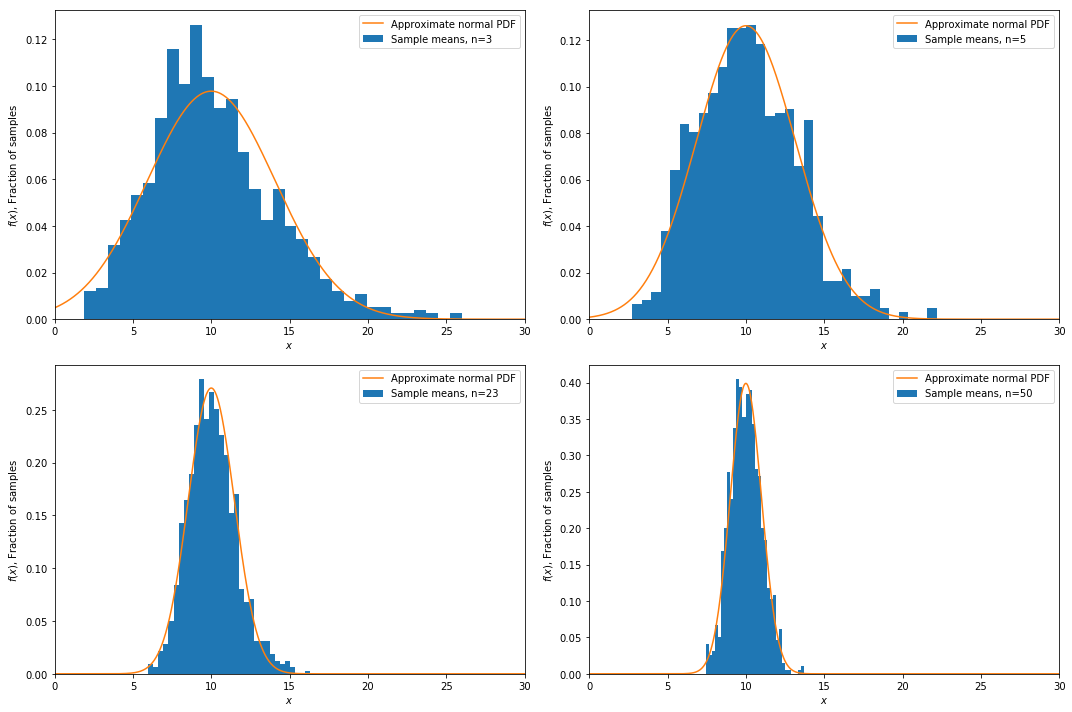

In [73]:

plt.show()

# Выводы:
    1. Увеличение размера выборок, на основе которых считается выборочное среднее приближает нормальное распределение к распределению значений выборочных средних.
    2. В случае с Гамма-распределением с параметрами (2, 5) визуальное сходство с НР достигается при 23<n<50